In [1]:
!git branch

  main
* nasdaq-all


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps

import re
import networkx as nx
from stats import *
from data import *
from procedures import *
import time
import os
from datetime import date

%matplotlib inline

In [3]:
START = date(2022, 10, 31)
STOP = date(2023, 10, 30)
THRESHOLD = 0.3

In [4]:

adj_close_array_and_ticker, _ = read_data('/home/danila/Downloads/historical_stock_data', START, STOP)
daily_returnes_tickers = get_transformed_data(
    '/home/danila/Downloads/historical_stock_data',
    START,
    STOP
)

In [5]:
# в данных нет пропусков

pd.isna(daily_returnes_tickers).any().any()

False

In [6]:
# все данные числовые

(daily_returnes_tickers.dtypes == 'float64').all()

True

In [7]:
get_all_indexes('/home/danila/Downloads/historical_stock_data')

['MFD',
 'NOC',
 'SRI',
 'TSLA',
 'CX',
 'ISD',
 'COF',
 'VMW',
 'CRS',
 'FMN',
 'RM',
 'BHP',
 'WPP',
 'RCP',
 'TY',
 'AWK',
 'VGI',
 'BGR',
 'PPT',
 'AAPL',
 'SA',
 'CDAY',
 'ADX',
 'KFY',
 'SJM',
 'NRP',
 'CTRA',
 'MHO',
 'GNL',
 'NGS',
 'PGR',
 'MEI',
 'EVA',
 'UNFI',
 'AFGB',
 'BHVN',
 'HTGC',
 'SUPV',
 'DDD',
 'BGY',
 'DIN',
 'JPI']

In [8]:
daily_returnes_tickers

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
MFD,-0.004920,-0.009913,0.006207,0.002472,0.003697,0.012225,-0.012225,0.043328,0.010545,-0.002334,...,-0.001446,-0.016047,-0.002946,-0.010378,-0.011994,0.019418,-0.007424,0.014793,-0.008850,0.010317
NOC,-0.024206,-0.010467,-0.009074,-0.005228,0.022695,0.011453,-0.014506,-0.002912,-0.075972,-0.022496,...,-0.000143,0.003593,-0.001672,-0.008692,-0.010556,-0.004505,0.010024,-0.011404,-0.009907,-0.009323
SRI,-0.006249,0.017209,0.072210,0.055737,0.025933,-0.035570,-0.005912,0.023028,0.013158,-0.004504,...,-0.002238,-0.035932,-0.032461,0.009552,-0.025272,0.006681,-0.010956,0.022391,-0.038431,0.019705
TSLA,0.001230,-0.058011,0.001534,-0.037092,-0.051377,-0.029767,-0.074365,0.071329,0.027155,-0.025950,...,0.003656,-0.048931,-0.097616,-0.037588,0.000424,0.020719,-0.019118,-0.031855,0.007457,-0.049138
CX,0.017972,-0.057608,0.008054,0.077159,-0.002478,0.017221,-0.019705,0.085767,0.042464,-0.019890,...,-0.012481,-0.044951,-0.009901,-0.004988,-0.010050,0.000000,0.010050,0.032790,-0.041158,-0.001682
ISD,0.021471,-0.012330,-0.013322,0.015801,0.005759,-0.003287,-0.012111,0.026536,-0.004100,-0.004117,...,-0.001759,0.000000,-0.010620,-0.006247,0.003575,0.000000,-0.016187,0.002716,-0.001810,0.002714
COF,0.007424,-0.034286,-0.043466,0.036855,0.021326,0.007609,-0.039327,0.117265,0.024645,-0.041091,...,0.009119,-0.021757,-0.034250,-0.027006,0.001661,-0.013142,-0.002582,0.006051,0.087960,0.028245
VMW,0.000800,-0.005967,-0.025146,0.014189,0.005224,0.005555,-0.012587,0.036248,0.011796,-0.003455,...,-0.080164,0.006941,-0.100793,0.003984,0.032339,-0.033798,-0.016257,-0.012147,-0.029586,0.030610
CRS,0.017230,-0.072189,0.022623,0.068311,0.017387,-0.006868,-0.004861,0.045867,-0.021043,0.011443,...,0.006599,-0.029649,-0.019569,-0.019960,-0.002799,0.016681,-0.018827,0.064632,-0.032434,0.008604
FMN,0.013232,0.007053,-0.008065,0.024989,0.013726,-0.006839,-0.004914,0.019513,-0.004842,-0.008776,...,-0.004211,-0.009539,-0.008556,-0.005948,-0.006529,0.009777,-0.007596,0.001089,-0.006550,-0.002193


In [8]:
daily_returnes_tickers.var(axis=1)

# есть нулевая дисперсия FMO

MFD     1.083649e-04
NOC     2.413937e-04
SRI     7.746518e-04
TSLA    1.424570e-03
CX      5.812537e-04
ISD     7.343504e-05
COF     5.342322e-04
VMW     2.796859e-04
CRS     7.051144e-04
FMN     5.600211e-05
RM      6.386484e-04
BHP     3.771098e-04
WPP     2.754569e-04
RCP     5.067469e-07
TY      7.289111e-05
AWK     1.808837e-04
VGI     5.384340e-05
BGR     1.750433e-04
PPT     6.873889e-05
AAPL    2.500899e-04
SA      7.573379e-04
CDAY    6.881518e-04
ADX     9.616407e-05
KFY     2.751470e-04
SJM     1.335879e-04
NRP     5.030782e-04
CTRA    4.124471e-04
MHO     5.073509e-04
GNL     4.149459e-04
NGS     5.847111e-04
PGR     3.536863e-04
MEI     7.524137e-04
EVA     7.324839e-03
UNFI    1.590725e-03
AFGB    1.776663e-04
BHVN    2.248674e-03
HTGC    3.669037e-04
SUPV    1.512310e-03
DDD     1.513427e-03
BGY     8.882672e-05
DIN     4.074674e-04
JPI     9.090116e-05
dtype: float64

In [9]:
np.isnan(daily_returnes_tickers.var()).any()

False

In [10]:
trad_proc = TraditionalProcedure(daily_returnes_tickers, THRESHOLD, 40)

In [11]:
trad_proc.calculate_estimations()

In [12]:
np.any(np.isnan(trad_proc.t_stat_estimations))

False

In [2]:
# p-values
# для эллиптических распределений
# для больших n ???

# k = kurtosis([daily_A, daily_AA, daily_AAME, daily_AAL, daily_AAMC], 250, 5)
# p_values_pearson = []
# p_values_sign = []

# for i in range(N):
#     ps_pearson = []
#     ps_sign = []
    
#     for j in range(N):
#         if i == j:
#             ps_pearson.append(0)
#             ps_sign.append(0)
#         else:
#             ps_pearson.append(1 - sps.norm.cdf(np.sqrt(n/(k + 1)) * t_stats[i][j]))
#             ps_sign.append(1 - sps.norm.cdf((t_sign_stats[i][j] - n * threshold)/(np.sqrt(n*threshold*(1-threshold)))))
#     p_values_pearson.append(ps_pearson)
#     p_values_sign.append(ps_sign)
                      
# print('p_values pearson', '\n', np.array(p_values_pearson), '\n', 'p_values sign', '\n', np.array(p_values_sign))

# Graphs


10


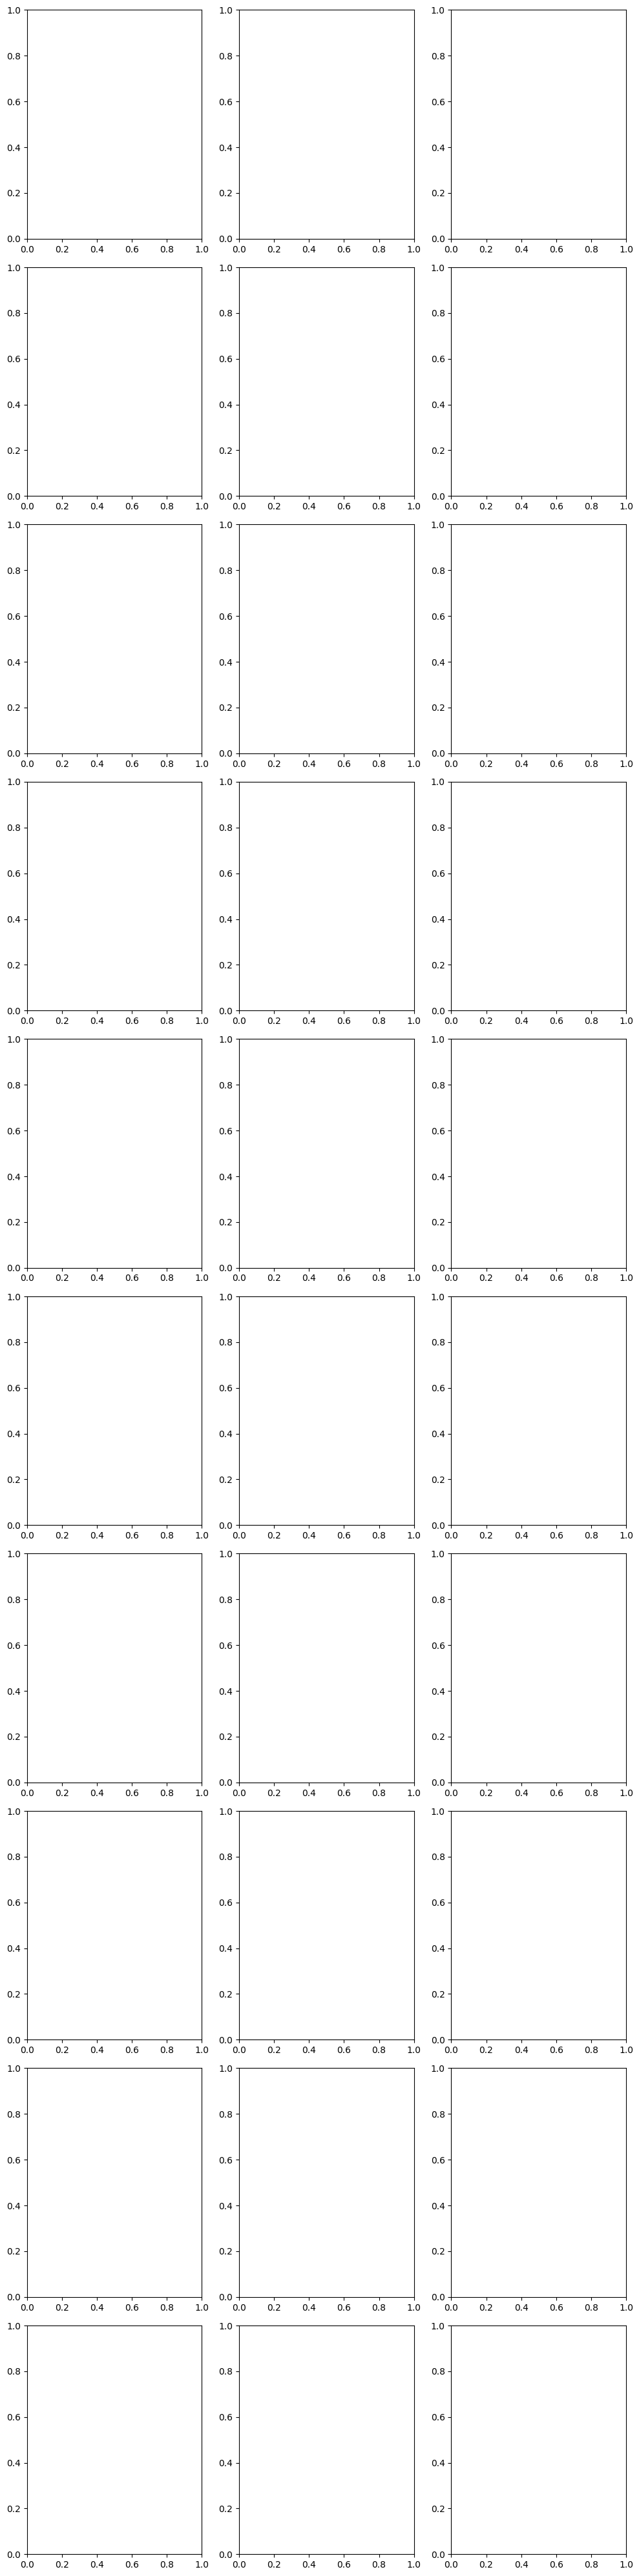

In [19]:
THRESHOLDS_KENDALL = [0.01, 0.1, 0.17, 0.2, 0.23, 0.25, 0.3, 0.26, 0.27, 0.28]
THRESHOLDS_SIGN = [threshold_sign(t_kd) for t_kd in THRESHOLDS_KENDALL]
THRESHOLDS_PEARSON = [round(threshold_pearson(t_sg), 2) for t_sg in THRESHOLDS_SIGN]
N_COMPANIES = 10
START = date(2021, 7, 1)
STOP = date(2021, 7, 15)
ALPHA = 0.05
FOLDER_PATH = '/home/danila/Downloads/archive/stock_market_data/nasdaq/csv'

dataframes, N_DAYS = read_data(FOLDER_PATH, N_COMPANIES, START, STOP)
print(N_DAYS)
daily_returns = np.array(daily(dataframes))
daily_returns_dataframes = daily_returns_dataframe(daily_returns, dataframes)
# nodes = [x[0] for x in dataframes]
nodes = ['WABC', 'INFN', 'MAT', 'EXPE', 'PCTY', 'SPWH', 'KELYA', 'EBTC', 'GTLS', 'CECO']


edges_pearson_list = {}
edges_sign_list = {}
edges_kendall_list = {}

for threshold in THRESHOLDS_KENDALL:
    p_values_pearson, p_values_sign, p_values_kendall = p_values(
        START,
        STOP,
        FOLDER_PATH,
        threshold,
        N_DAYS,
        N_COMPANIES,
        daily_returns,
        daily_returns_dataframes,
    )
    edges_pearson, edges_sign, edges_kendall = edges(
        p_values_pearson,
        p_values_sign,
        p_values_kendall,
        N_COMPANIES, ALPHA, nodes
    )
    edges_pearson_list[threshold] = edges_pearson
    edges_sign_list[threshold] = edges_sign
    edges_kendall_list[threshold] = edges_kendall

fig, ax = plt.subplots(10, 3, figsize=(10, 40), layout='tight')


In [20]:
table = pd.DataFrame(columns=['threshold', 'Pearson_Clique', 'Pearson_Ind_Set', 'Sign_Clique', 'Sign_Ind_Set', 'Kendall_Clique', 'Kendall_Ind_Set'])

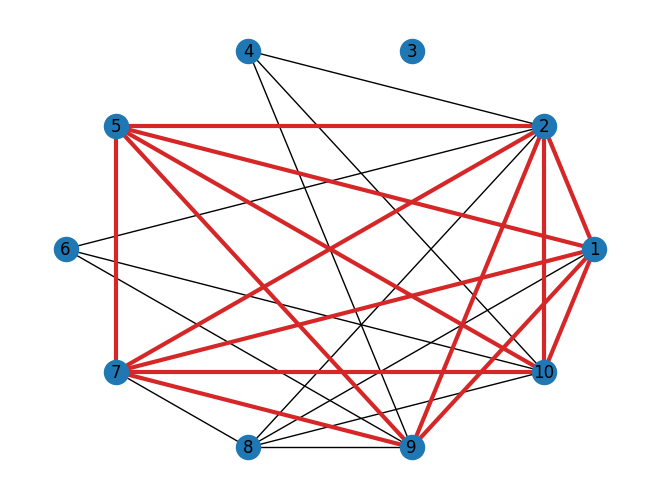

In [21]:
#example; skip


K = nx.Graph()
K.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
K.add_edges_from([(1, 2),(1, 5),(1, 7),(1, 9),(1, 10),(5, 2),(7, 2),(9, 2),(10, 2),(5, 7),(5, 9),(4, 9),(6, 9),(8, 9),(7,8),(5, 10),(4, 10),(6, 10),(8, 10),(9, 7),(1, 8),(10, 7),(4, 2),(6, 2),(8, 2),])

nx.draw(K, pos=nx.circular_layout(K), with_labels=True)
nx.draw_networkx_edges(
    K,
    pos=nx.circular_layout(K),
    edgelist=[(1, 2),(1, 5),(1, 7),(1, 9),(1, 10),(5, 2),(7, 2),(9, 2),(10, 2),(5, 7),(5, 9),(5, 10),(9, 7),(10, 7),],
    width=3,
    edge_color="tab:red",
)

In [22]:
for i, threshold in enumerate(THRESHOLDS_KENDALL):
    G_pearson = nx.Graph()
    G_sign = nx.Graph()
    G_kendall = nx.Graph()

    G_pearson.add_nodes_from(nodes)
    G_sign.add_nodes_from(nodes)
    G_kendall.add_nodes_from(nodes)

    G_pearson.add_edges_from(edges_pearson_list[threshold])
    G_sign.add_edges_from(edges_sign_list[threshold])
    G_kendall.add_edges_from(edges_kendall_list[threshold])

    nx.draw(G_pearson, pos=nx.circular_layout(G_pearson), ax=ax[i, 0],
            with_labels=True)
    ax[i, 0].set_title(f'Pearson, pearson_threshold={THRESHOLDS_PEARSON[i]}')

    nx.draw(G_sign, pos=nx.circular_layout(G_sign), ax=ax[i, 1],
            with_labels=True)
    ax[i, 1].set_title(f'Sign, sign_threshold={THRESHOLDS_SIGN[i]}')

    nx.draw(G_kendall, pos=nx.circular_layout(G_sign), ax=ax[i, 2],
            with_labels=True)
    ax[i, 2].set_title(f'Kendall, kendall_threshold={threshold}')

    clique_pearson = list(nx.find_cliques(G_pearson))
    clique_sign = list(nx.find_cliques(G_sign))
    clique_kendall = list(nx.find_cliques(G_kendall))

    ind_set_pearson = get_independent_set(G_pearson.nodes, G_pearson.edges)
    ind_set_sign = get_independent_set(G_sign.nodes, G_sign.edges)
    ind_set_kendall = get_independent_set(G_kendall.nodes, G_kendall.edges)


    table = table.append(
        {
            'threshold': threshold, 
            'Pearson_Clique': clique_pearson,
            'Pearson_Ind_Set': ind_set_pearson,
            'Sign_Clique': clique_sign,
            'Sign_Ind_Set': ind_set_sign,
            'Kendall_Clique': clique_kendall,
            'Kendall_Ind_Set': ind_set_kendall
        },
        ignore_index=True
    )



/tmp/ipykernel_15910/2446622279.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(
/tmp/ipykernel_15910/2446622279.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(
/tmp/ipykernel_15910/2446622279.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(
/tmp/ipykernel_15910/2446622279.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(
/tmp/ipykernel_15910/2446622279.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(
/tmp/ipykernel_15910

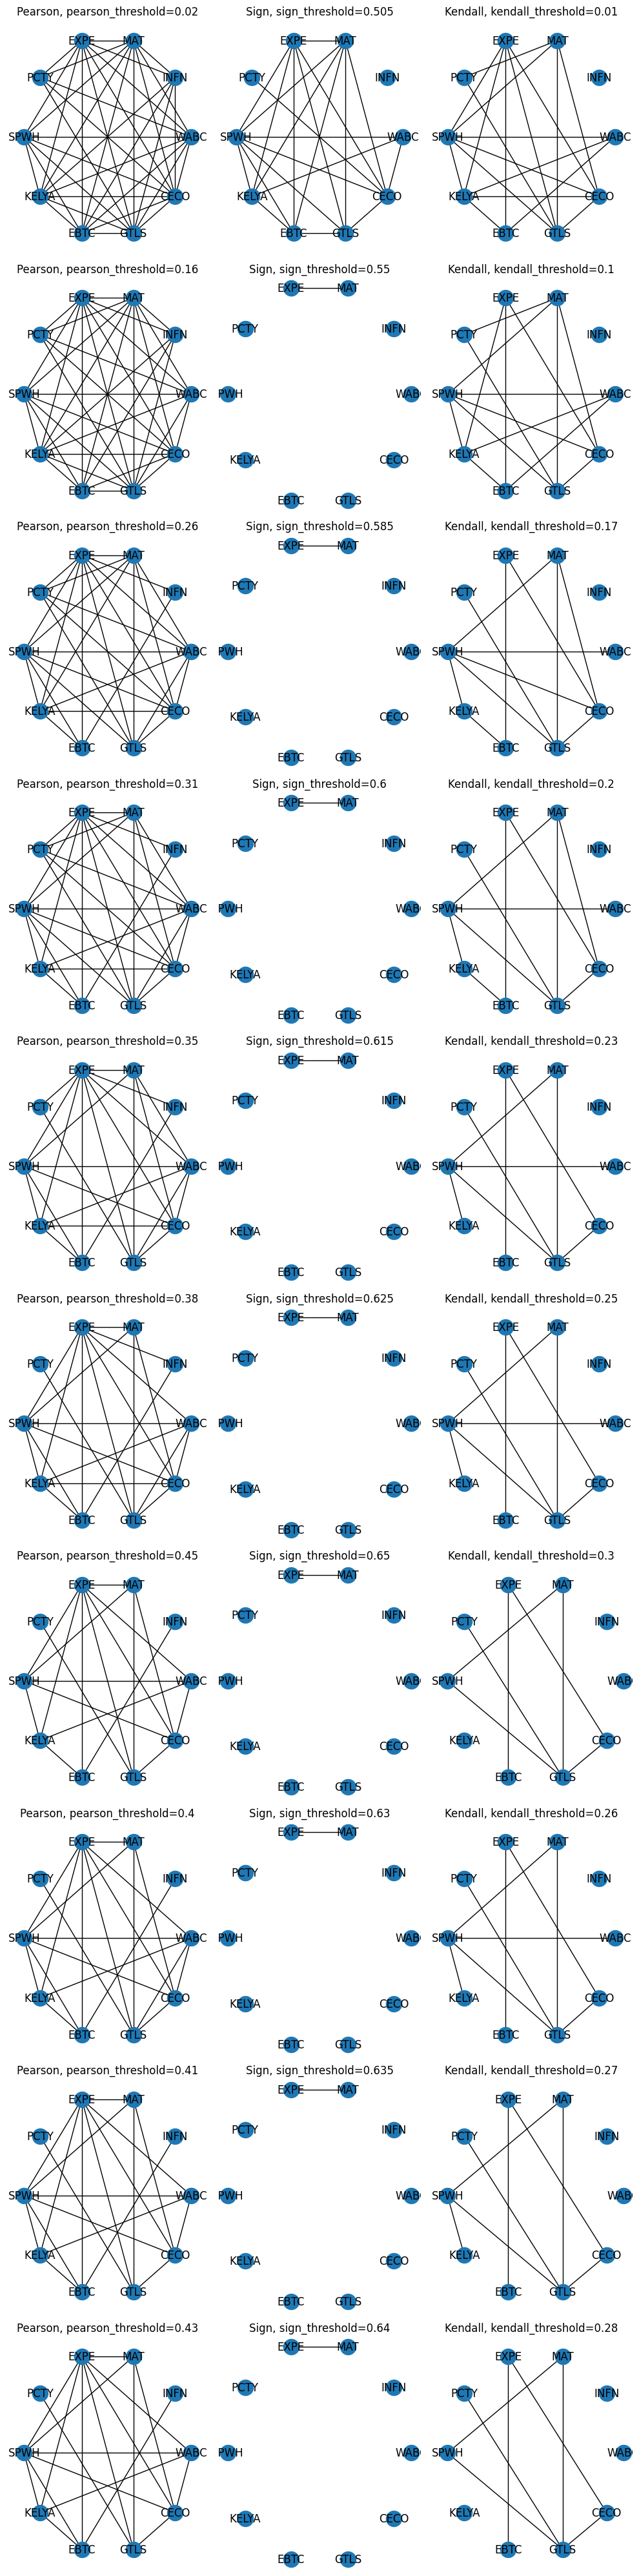

In [23]:
fig

In [7]:
table.style

,threshold,Pearson_Clique,Pearson_Ind_Set,Sign_Clique,Sign_Ind_Set,Kendall_Clique,Kendall_Ind_Set
0,0.010000,"[['INFN', 'WABC', 'GTLS', 'CECO', 'SPWH', 'EXPE', 'PCTY', 'MAT', 'KELYA', 'EBTC']]",[],"[['INFN', 'GTLS', 'CECO', 'MAT', 'KELYA', 'EBTC', 'WABC', 'EXPE'], ['INFN', 'GTLS', 'CECO', 'MAT', 'KELYA', 'EBTC', 'WABC', 'SPWH'], ['INFN', 'GTLS', 'CECO', 'MAT', 'KELYA', 'EBTC', 'PCTY', 'EXPE'], ['INFN', 'GTLS', 'CECO', 'MAT', 'KELYA', 'EBTC', 'PCTY', 'SPWH']]",[],"[['INFN', 'WABC', 'GTLS', 'CECO', 'SPWH', 'EXPE', 'PCTY', 'MAT', 'KELYA', 'EBTC']]",[]
1,0.100000,"[['INFN', 'WABC', 'GTLS', 'EXPE', 'PCTY', 'KELYA', 'EBTC', 'CECO'], ['INFN', 'WABC', 'GTLS', 'EXPE', 'PCTY', 'KELYA', 'EBTC', 'MAT', 'SPWH']]",[],"[['INFN', 'MAT', 'EXPE', 'KELYA', 'WABC', 'EBTC'], ['INFN', 'MAT', 'EXPE', 'KELYA', 'CECO', 'PCTY', 'GTLS'], ['INFN', 'MAT', 'EXPE', 'KELYA', 'CECO', 'PCTY', 'EBTC'], ['INFN', 'MAT', 'SPWH', 'PCTY']]",[],"[['INFN', 'GTLS', 'CECO', 'SPWH', 'EXPE', 'MAT', 'KELYA', 'EBTC', 'WABC'], ['INFN', 'GTLS', 'CECO', 'SPWH', 'EXPE', 'MAT', 'KELYA', 'EBTC', 'PCTY']]",[]
2,0.170000,"[['EXPE', 'KELYA', 'WABC', 'MAT', 'EBTC'], ['EXPE', 'KELYA', 'INFN', 'PCTY', 'GTLS', 'CECO'], ['EXPE', 'KELYA', 'INFN', 'PCTY', 'GTLS', 'MAT'], ['EXPE', 'KELYA', 'INFN', 'PCTY', 'EBTC', 'MAT'], ['SPWH', 'PCTY', 'MAT', 'GTLS'], ['SPWH', 'PCTY', 'MAT', 'EBTC']]",[],"[['MAT', 'WABC', 'EXPE', 'KELYA', 'EBTC'], ['MAT', 'INFN', 'PCTY', 'EXPE'], ['MAT', 'INFN', 'PCTY', 'GTLS'], ['MAT', 'INFN', 'KELYA', 'EXPE', 'EBTC'], ['MAT', 'INFN', 'KELYA', 'GTLS', 'CECO'], ['MAT', 'SPWH', 'PCTY']]",[],"[['EXPE', 'MAT', 'KELYA', 'WABC', 'EBTC'], ['EXPE', 'MAT', 'KELYA', 'INFN', 'PCTY', 'GTLS', 'CECO'], ['EXPE', 'MAT', 'KELYA', 'INFN', 'PCTY', 'GTLS', 'SPWH'], ['EXPE', 'MAT', 'KELYA', 'INFN', 'PCTY', 'EBTC', 'SPWH']]",[]
3,0.200000,"[['EXPE', 'WABC', 'EBTC', 'MAT'], ['EXPE', 'WABC', 'EBTC', 'KELYA'], ['EXPE', 'PCTY', 'CECO', 'GTLS'], ['EXPE', 'PCTY', 'MAT', 'INFN', 'EBTC'], ['EXPE', 'PCTY', 'MAT', 'GTLS'], ['EXPE', 'KELYA', 'INFN', 'EBTC'], ['SPWH', 'PCTY', 'MAT']]",[],"[['MAT', 'WABC', 'KELYA'], ['MAT', 'INFN', 'EXPE', 'KELYA'], ['MAT', 'INFN', 'GTLS', 'PCTY'], ['MAT', 'INFN', 'GTLS', 'CECO', 'KELYA'], ['SPWH', 'PCTY'], ['EBTC', 'KELYA', 'WABC'], ['EBTC', 'KELYA', 'EXPE']]",[],"[['WABC', 'KELYA', 'EBTC'], ['INFN', 'CECO', 'GTLS'], ['INFN', 'CECO', 'KELYA'], ['INFN', 'MAT', 'EXPE', 'PCTY', 'GTLS'], ['INFN', 'MAT', 'EXPE', 'PCTY', 'EBTC'], ['INFN', 'MAT', 'EXPE', 'KELYA', 'EBTC'], ['INFN', 'MAT', 'SPWH', 'EBTC', 'PCTY'], ['INFN', 'MAT', 'SPWH', 'EBTC', 'KELYA']]",[]
4,0.230000,"[['EXPE', 'WABC', 'KELYA', 'EBTC'], ['EXPE', 'PCTY', 'INFN', 'MAT'], ['EXPE', 'PCTY', 'EBTC'], ['GTLS', 'PCTY'], ['CECO'], ['SPWH', 'PCTY', 'MAT']]",['CECO'],"[['GTLS', 'CECO'], ['CECO', 'INFN'], ['SPWH', 'PCTY'], ['PCTY', 'INFN'], ['KELYA', 'INFN', 'MAT'], ['KELYA', 'EBTC', 'WABC'], ['KELYA', 'EBTC', 'EXPE']]",[],"[['WABC', 'KELYA', 'EBTC'], ['PCTY', 'MAT', 'EXPE', 'INFN'], ['PCTY', 'MAT', 'GTLS'], ['PCTY', 'MAT', 'SPWH'], ['PCTY', 'EBTC', 'EXPE'], ['PCTY', 'EBTC', 'SPWH'], ['CECO', 'GTLS'], ['KELYA', 'EXPE', 'INFN'], ['KELYA', 'EXPE', 'EBTC']]",[]
5,0.250000,"[['GTLS', 'PCTY'], ['CECO'], ['SPWH', 'PCTY'], ['EXPE', 'WABC', 'KELYA'], ['EXPE', 'WABC', 'EBTC'], ['EXPE', 'INFN'], ['PCTY', 'INFN', 'MAT']]",['CECO'],"[['INFN', 'PCTY'], ['INFN', 'MAT'], ['WABC', 'KELYA', 'EBTC'], ['GTLS', 'CECO'], ['SPWH'], ['EXPE']]","['EXPE', 'SPWH']","[['WABC', 'KELYA', 'EBTC'], ['CECO'], ['PCTY', 'INFN', 'EXPE', 'MAT'], ['PCTY', 'SPWH'], ['PCTY', 'GTLS']]",['CECO']
6,0.300000,"[['INFN'], ['WABC'], ['GTLS'], ['CECO'], ['SPWH'], ['EXPE'], ['PCTY'], ['MAT'], ['KELYA'], ['EBTC']]","['WABC', 'INFN', 'MAT', 'EXPE', 'PCTY', 'SPWH', 'KELYA', 'EBTC', 'GTLS', 'CECO']","[['INFN', 'MAT'], ['WABC'], ['GTLS'], ['CECO'], ['SPWH'], ['EXPE'], ['PCTY'], ['KELYA'], ['EBTC']]","['WABC', 'EXPE', 'PCTY', 'SPWH', 'KELYA', 'EBTC', 'GTLS', 'CECO']","[['INFN', 'PCTY', 'MAT'], ['WABC'], ['GTLS'], ['CECO'], ['SPWH'], ['EXPE'], ['KELYA'], ['EBTC']]","['WABC', 

In [ ]:
Graph = nx.Graph()
Graph.add_nodes_from(nodes)
Graph.add_edges_from()



In [21]:
table.head(1)['Pearson_Clique']

0    [[EXPE, CECO, KELYA, MAT, GTLS, INFN, EBTC], [...
Name: Pearson_Clique, dtype: object

In [74]:
kendall = [['CECO'], ['EBTC', 'KELYA', 'WABC'], ['PCTY', 'SPWH'], ['PCTY', 'GTLS'], ['PCTY', 'EXPE', 'INFN', 'MAT']]
sign = [['CECO', 'GTLS'], ['EBTC', 'KELYA', 'WABC'], ['INFN', 'MAT'], ['INFN', 'PCTY'], ['SPWH'], ['EXPE']]
pearson = [['CECO'], ['MAT', 'INFN', 'PCTY'], ['SPWH', 'PCTY'], ['GTLS', 'PCTY'], ['EXPE', 'INFN'], ['EXPE', 'WABC', 'KELYA'], ['EXPE', 'WABC', 'EBTC']]

for x in pearson:
    for y in sign:
        if x == y:
            print('Pearson - Sign')
            print(x)
            
for x in pearson:
    for y in kendall:
        if x == y:
            print('Pearson - Kendall')
            print(x)
                  
for x in kendall:
    for y in sign:
        if x == y:
            print('Kendall - Sign')
            print(x)
            
print('Pearson - Sign')
for x in pearson:
    for y in sign:
        if(all(i in x for i in y)):
            print('В случае Знаковой меры, клика', y, 'является подмножеством клики', x, 'в случае меры Пирсона')
        if (all(i in y for i in x)):
            print('В случае меры Пирсона, клика', x, 'является подмножеством клики', y, 'в случае Знаковой меры')
            
print('Pearson - Kendall')
for x in pearson:
    for y in kendall:
        if(all(i in x for i in y)):
            print('В случае меры Кендалла, клика', y, 'является подмножеством клики', x, 'в случае меры Пирсона')
        if (all(i in y for i in x)):
            print('В случае меры Пирсона, клика', x, 'является подмножеством клики', y, 'в случае меры Кендалла')
            
print('Sign - Kendall')
for x in sign:
    for y in kendall:
        if(all(i in x for i in y)):
            print('В случае меры Кендалла, клика', y, 'является подмножеством клики', x, 'в случае Знаковой меры')
        if (all(i in y for i in x)):
            print('В случае Знаковой меры, клика', x, 'является подмножеством клики', y, 'в случае меры Кендалла')

Pearson - Kendall
['CECO']
Kendall - Sign
['EBTC', 'KELYA', 'WABC']
Pearson - Sign
В случае меры Пирсона, клика ['CECO'] является подмножеством клики ['CECO', 'GTLS'] в случае Знаковой меры
В случае Знаковой меры, клика ['INFN', 'MAT'] является подмножеством клики ['MAT', 'INFN', 'PCTY'] в случае меры Пирсона
В случае Знаковой меры, клика ['INFN', 'PCTY'] является подмножеством клики ['MAT', 'INFN', 'PCTY'] в случае меры Пирсона
В случае Знаковой меры, клика ['SPWH'] является подмножеством клики ['SPWH', 'PCTY'] в случае меры Пирсона
В случае Знаковой меры, клика ['EXPE'] является подмножеством клики ['EXPE', 'INFN'] в случае меры Пирсона
В случае Знаковой меры, клика ['EXPE'] является подмножеством клики ['EXPE', 'WABC', 'KELYA'] в случае меры Пирсона
В случае Знаковой меры, клика ['EXPE'] является подмножеством клики ['EXPE', 'WABC', 'EBTC'] в случае меры Пирсона
Pearson - Kendall
В случае меры Кендалла, клика ['CECO'] является подмножеством клики ['CECO'] в случае меры Пирсона
В слу

In [64]:
a = [1, 2, 3]
b = [1, 2, 3, 4]
a in b

False

In [7]:

THRESHOLDS = [-0.2, -0.1, 0.005, 0.01, 0.1, 0.17, 0.2, 0.23, 0.25]
N_COMPANIES = 5
N_DAYS = 250
ALPHA = 0.05
FOLDER_PATH = '/home/danila/Downloads/archive/stock_market_data/nasdaq/csv'


dataframes = read_data(FOLDER_PATH, N_COMPANIES)
daily_returns = daily(dataframes)
daily_returns_dataframes = daily_returns_dataframe(daily_returns, dataframes)

edges_pearson_list = {}
edges_sign_list = {}
edges_kendall_list = {}

Дерьмовые данные
Недостаточно данных


In [8]:
start = time.time()
for threshold in THRESHOLDS:
    p_values_pearson, p_values_sign, p_values_kendall = p_values(threshold, N_DAYS, N_COMPANIES,
                                           daily_returns, daily_returns_dataframes)
    edges_pearson, edges_sign, edges_kendall = edges(p_values_pearson, p_values_sign, p_values_kendall,
                                                     N_COMPANIES, ALPHA)
    edges_pearson_list[threshold] = edges_pearson
    edges_sign_list[threshold] = edges_sign
    edges_kendall_list[threshold] = edges_kendall



# print("edges_pearson", '\n', edges_pearson, '\n', 'edges_sign', '\n', edges_sign)

nodes = ['A', 'AA', 'AAME', 'AAL', 'AAMC']

end = time.time()
print(end - start)

TypeError: p_values() missing 1 required positional argument: 'dataframe'

In [6]:
G_pearson.__dict__


{'graph': {},
 '_node': {'A': {}, 'AA': {}, 'AAME': {}, 'AAL': {}, 'AAMC': {}},
 '_adj': {'A': {}, 'AA': {}, 'AAME': {}, 'AAL': {}, 'AAMC': {}},
 'edges': EdgeView([]),
 'nodes': NodeView(('A', 'AA', 'AAME', 'AAL', 'AAMC'))}

In [7]:
G_pearson.edges

EdgeView([])

In [9]:
########################################################################################################

In [6]:
for threshold in THRESHOLDS:
    p_values_pearson, p_values_sign, p_values_kendall = p_values(threshold, N_DAYS, N_COMPANIES,
                                           daily_returns, daily_returns_dataframes, elliptical=False)
    edges_pearson, edges_sign = edges(p_values_pearson, p_values_sign, p_values_kendall,
                                                     N_COMPANIES, ALPHA, elliptical=False)
    edges_pearson_list[threshold] = edges_pearson
    edges_sign_list[threshold] = edges_sign



# print("edges_pearson", '\n', edges_pearson, '\n', 'edges_sign', '\n', edges_sign)

nodes = ['A', 'AA', 'AAME', 'AAL', 'AAMC']


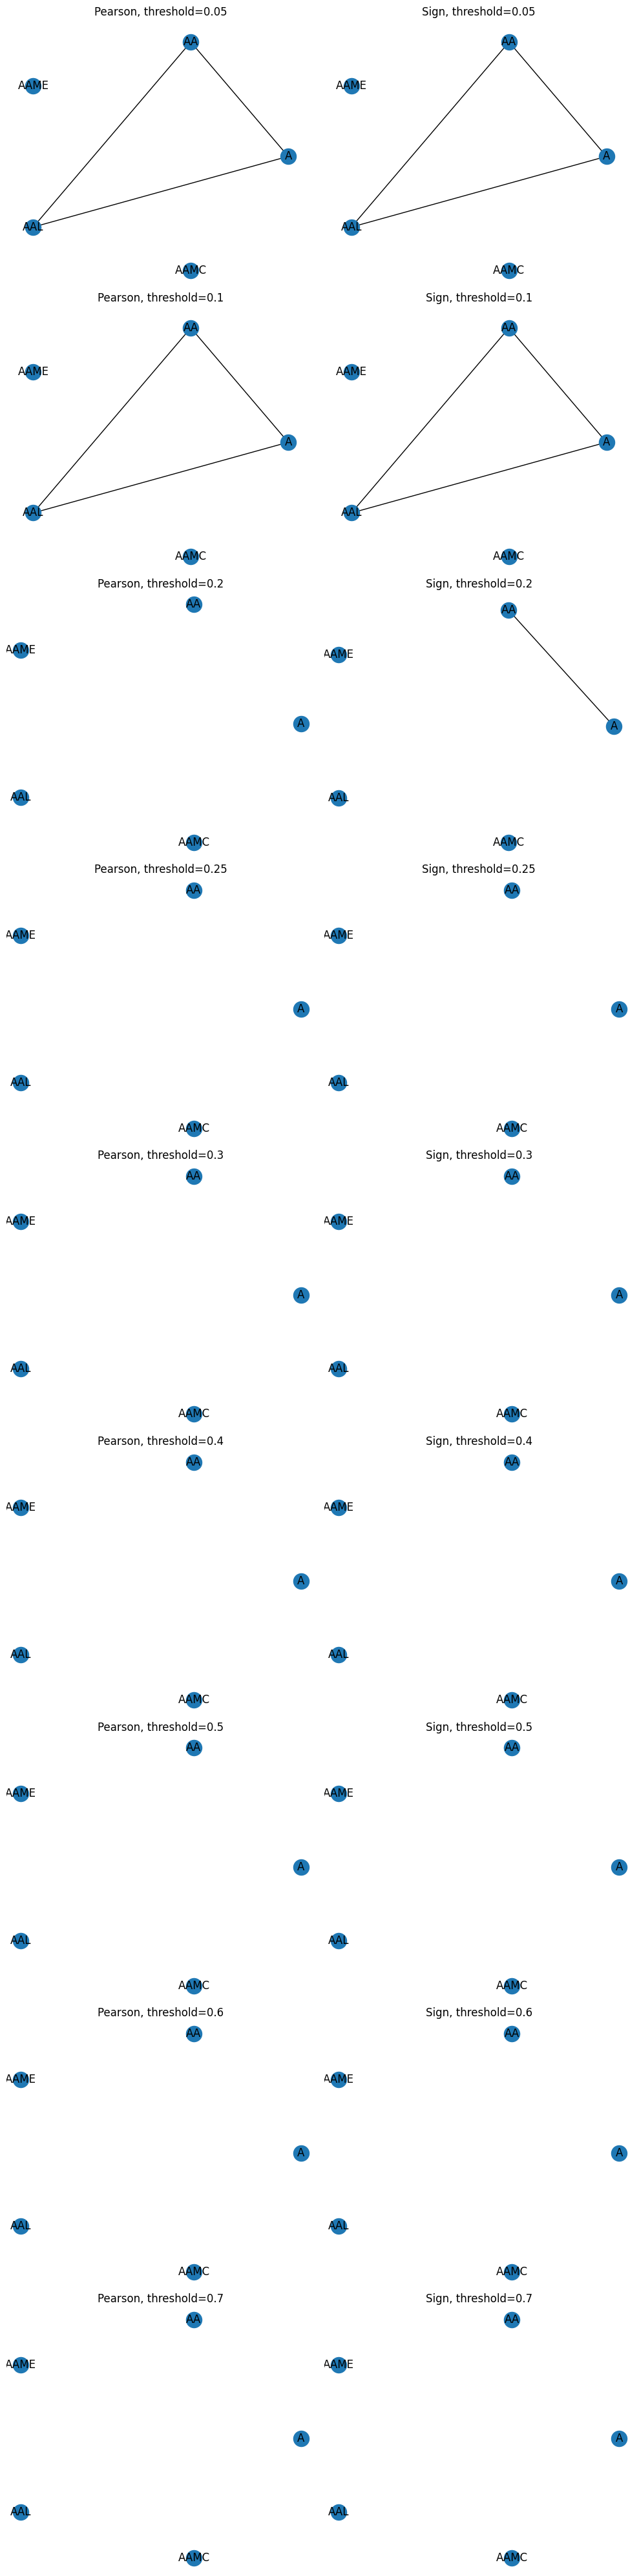

In [7]:
fig, ax = plt.subplots(9, 2, figsize=(10, 40), layout='tight')
for i, threshold in enumerate(THRESHOLDS):
    G_pearson = nx.Graph()
    G_sign = nx.Graph()
    #G_kendall = nx.Graph()
    
    G_pearson.add_nodes_from(nodes)
    G_sign.add_nodes_from(nodes)
    #G_kendall.add_nodes_from(nodes)
    
    G_pearson.add_edges_from(edges_pearson_list[threshold])
    G_sign.add_edges_from(edges_sign_list[threshold])
    #G_kendall.add_edges_from(edges_kendall_list[threshold])
    
    nx.draw(G_pearson, pos=nx.circular_layout(G_pearson), ax=ax[i, 0], with_labels=True)
    ax[i, 0].set_title(f'Pearson, threshold={threshold}')

    
    nx.draw(G_sign, pos=nx.circular_layout(G_sign), ax=ax[i, 1], with_labels=True)
    ax[i, 1].set_title(f'Sign, threshold={threshold}')
    
    #nx.draw(G_kendall, pos=nx.circular_layout(G_sign), ax=ax[i, 2], with_labels=True)
    #ax[i, 2].set_title(f'Kendall, threshold={threshold}')
    

plt.show()

In [2]:
!pwd

/home/danila/PycharmProjects/pythonProject1


In [1]:
import os

In [47]:
file_names_list: list[str] = os.listdir('/home/danila/Downloads/archive/stock_market_data/nasdaq/csv')

In [48]:
file_names_str = ' '.join(file_names_list)
print(file_names_str)

WABC.csv INFN.csv GMAN.csv MAT.csv EXPE.csv COCO.csv PCTY.csv SPWH.csv KELYA.csv EBTC.csv GTLS.csv CECO.csv RBCAA.csv REFR.csv SFM.csv IDCC.csv SWKS.csv BMRN.csv BIOS.csv FREE.csv BLKB.csv WAYN.csv SNCR.csv BLMN.csv CYCC.csv EGHT.csv BSPM.csv VALU.csv CAAS.csv MMLP.csv GSBC.csv YNDX.csv SBNY.csv AELTF.csv PCRX.csv BLDP.csv BRFH.csv PETS.csv CBAY.csv LECO.csv SLP.csv ANGI.csv FRSH.csv RWLK.csv COBZ.csv AIMC.csv QRHC.csv CVGW.csv ESRX.csv UMPQ.csv VLY.csv SBGI.csv GASS.csv GNBC.csv RNWK.csv MARPS.csv UCBI.csv MRVL.csv PCYO.csv OTEX.csv CPRX.csv ACIW.csv PME.csv SFST.csv AIRT.csv GRSFF.csv HOLX.csv MSCC.csv VOXX.csv RXDX.csv EHTH.csv CAKE.csv Z.csv ANGO.csv AUBN.csv SLM.csv ATSG.csv SKYW.csv SCHN.csv PINC.csv MRNS.csv ATRA.csv CSIQ.csv PAYX.csv ANAC.csv ISBC.csv GLDD.csv ARCB.csv RADA.csv RITT.csv LWAY.csv XNCR.csv VNOM.csv FTNT.csv SNMX.csv BPOP.csv MYRG.csv ILMN.csv RGLD.csv STRA.csv DFEL.csv NEOG.csv MRCY.csv CNTY.csv MEIP.csv FTEK.csv CSPI.csv FNLC.csv HAYN.csv CFNB.csv UFPT.csv ON.cs

In [49]:
index = re.findall('[A-Z]+', file_names_str)
index

['WABC',
 'INFN',
 'GMAN',
 'MAT',
 'EXPE',
 'COCO',
 'PCTY',
 'SPWH',
 'KELYA',
 'EBTC',
 'GTLS',
 'CECO',
 'RBCAA',
 'REFR',
 'SFM',
 'IDCC',
 'SWKS',
 'BMRN',
 'BIOS',
 'FREE',
 'BLKB',
 'WAYN',
 'SNCR',
 'BLMN',
 'CYCC',
 'EGHT',
 'BSPM',
 'VALU',
 'CAAS',
 'MMLP',
 'GSBC',
 'YNDX',
 'SBNY',
 'AELTF',
 'PCRX',
 'BLDP',
 'BRFH',
 'PETS',
 'CBAY',
 'LECO',
 'SLP',
 'ANGI',
 'FRSH',
 'RWLK',
 'COBZ',
 'AIMC',
 'QRHC',
 'CVGW',
 'ESRX',
 'UMPQ',
 'VLY',
 'SBGI',
 'GASS',
 'GNBC',
 'RNWK',
 'MARPS',
 'UCBI',
 'MRVL',
 'PCYO',
 'OTEX',
 'CPRX',
 'ACIW',
 'PME',
 'SFST',
 'AIRT',
 'GRSFF',
 'HOLX',
 'MSCC',
 'VOXX',
 'RXDX',
 'EHTH',
 'CAKE',
 'Z',
 'ANGO',
 'AUBN',
 'SLM',
 'ATSG',
 'SKYW',
 'SCHN',
 'PINC',
 'MRNS',
 'ATRA',
 'CSIQ',
 'PAYX',
 'ANAC',
 'ISBC',
 'GLDD',
 'ARCB',
 'RADA',
 'RITT',
 'LWAY',
 'XNCR',
 'VNOM',
 'FTNT',
 'SNMX',
 'BPOP',
 'MYRG',
 'ILMN',
 'RGLD',
 'STRA',
 'DFEL',
 'NEOG',
 'MRCY',
 'CNTY',
 'MEIP',
 'FTEK',
 'CSPI',
 'FNLC',
 'HAYN',
 'CFNB',
 'UFPT',
 'ON'